In [6]:
from sklearn.datasets import fetch_covtype
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
%run ../kdd.ipynb

In [8]:
all_df, main_labels, config = get_processed_kdd_df()
all_df.head()

Normal class:  0    smurf.
Name: attack, dtype: object
TARGET_DICT {0: 'apache2', 1: 'back', 2: 'buffer_overflow', 3: 'ftp_write', 4: 'guess_passwd', 5: 'httptunnel', 6: 'imap', 7: 'ipsweep', 8: 'land', 9: 'loadmodule', 10: 'mailbomb', 11: 'mscan', 12: 'multihop', 13: 'named', 14: 'neptune', 15: 'nmap', 16: 'normal', 17: 'perl', 18: 'phf', 19: 'pod', 20: 'portsweep', 21: 'processtable', 22: 'ps', 23: 'rootkit', 24: 'saint', 25: 'satan', 26: 'sendmail', 27: 'smurf', 28: 'snmpgetattack', 29: 'snmpguess', 30: 'sqlattack', 31: 'teardrop', 32: 'udpstorm', 33: 'warezmaster', 34: 'worm', 35: 'xlock', 36: 'xsnoop', 37: 'xterm'}
NORMAL_TARGET 16
['duration', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'ser

,duration,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,16
1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,16
2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,16
3,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,28
4,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,28


In [9]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311029 entries, 0 to 311028
Columns: 118 entries, duration to attack
dtypes: float64(94), int64(24)
memory usage: 280.0 MB


In [10]:
all_df.isnull().sum()

duration                    0
protocol_type_icmp          0
protocol_type_tcp           0
protocol_type_udp           0
service_IRC                 0
                           ..
dst_host_serror_rate        0
dst_host_srv_serror_rate    0
dst_host_rerror_rate        0
dst_host_srv_rerror_rate    0
attack                      0
Length: 118, dtype: int64

In [11]:
all_df.describe()

,duration,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
count,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,...,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000
mean,17.902736,0.530397,0.383749,0.085854,0.000077,0.000048,0.000177,0.000482,0.000212,0.000186,...,199.193914,0.793494,0.024953,0.547919,0.004566,0.058764,0.058791,0.142659,0.141693,21.612461
std,407.644400,0.499076,0.486299,0.280148,0.008784,0.006944,0.013297,0.021955,0.014566,0.013654,...,100.306470,0.387090,0.096003,0.491963,0.035773,0.231296,0.232997,0.344380,0.346573,6.668736
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,244.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000
max,57715.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,37.000000


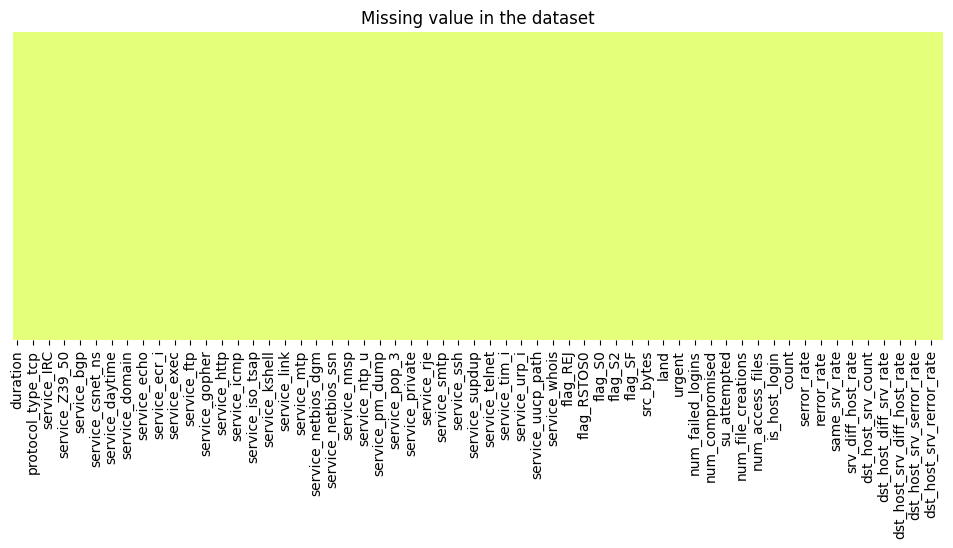

In [12]:
show_missing_values(all_df)

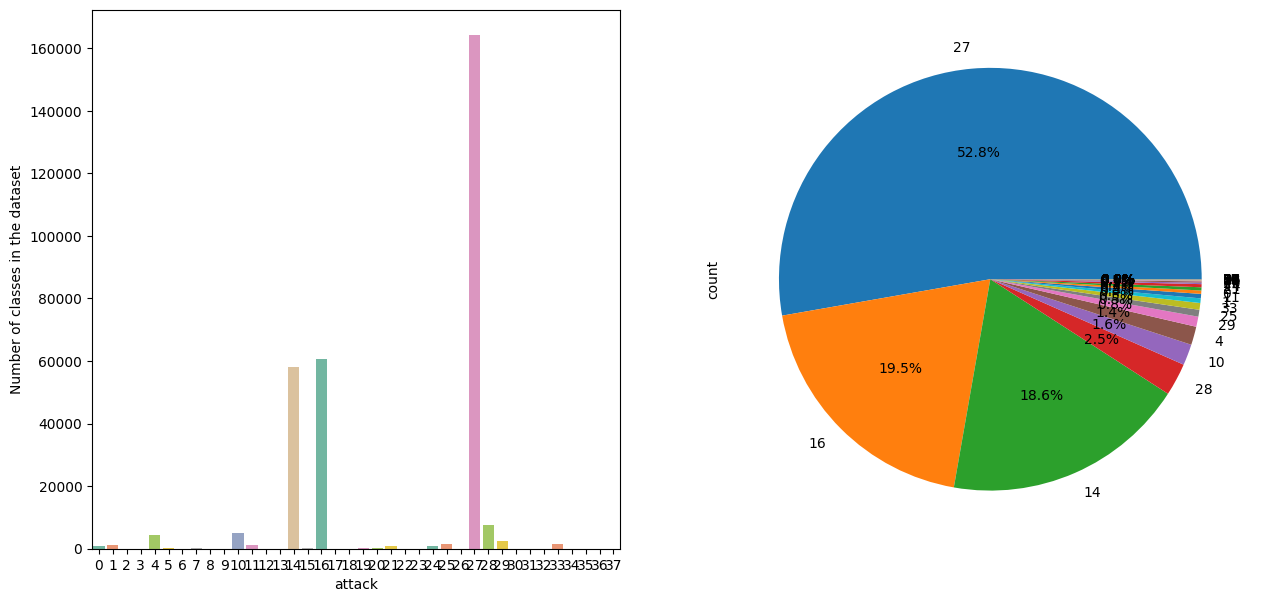

In [13]:
show_target_values(all_df, config['TARGET_COLUMN'])

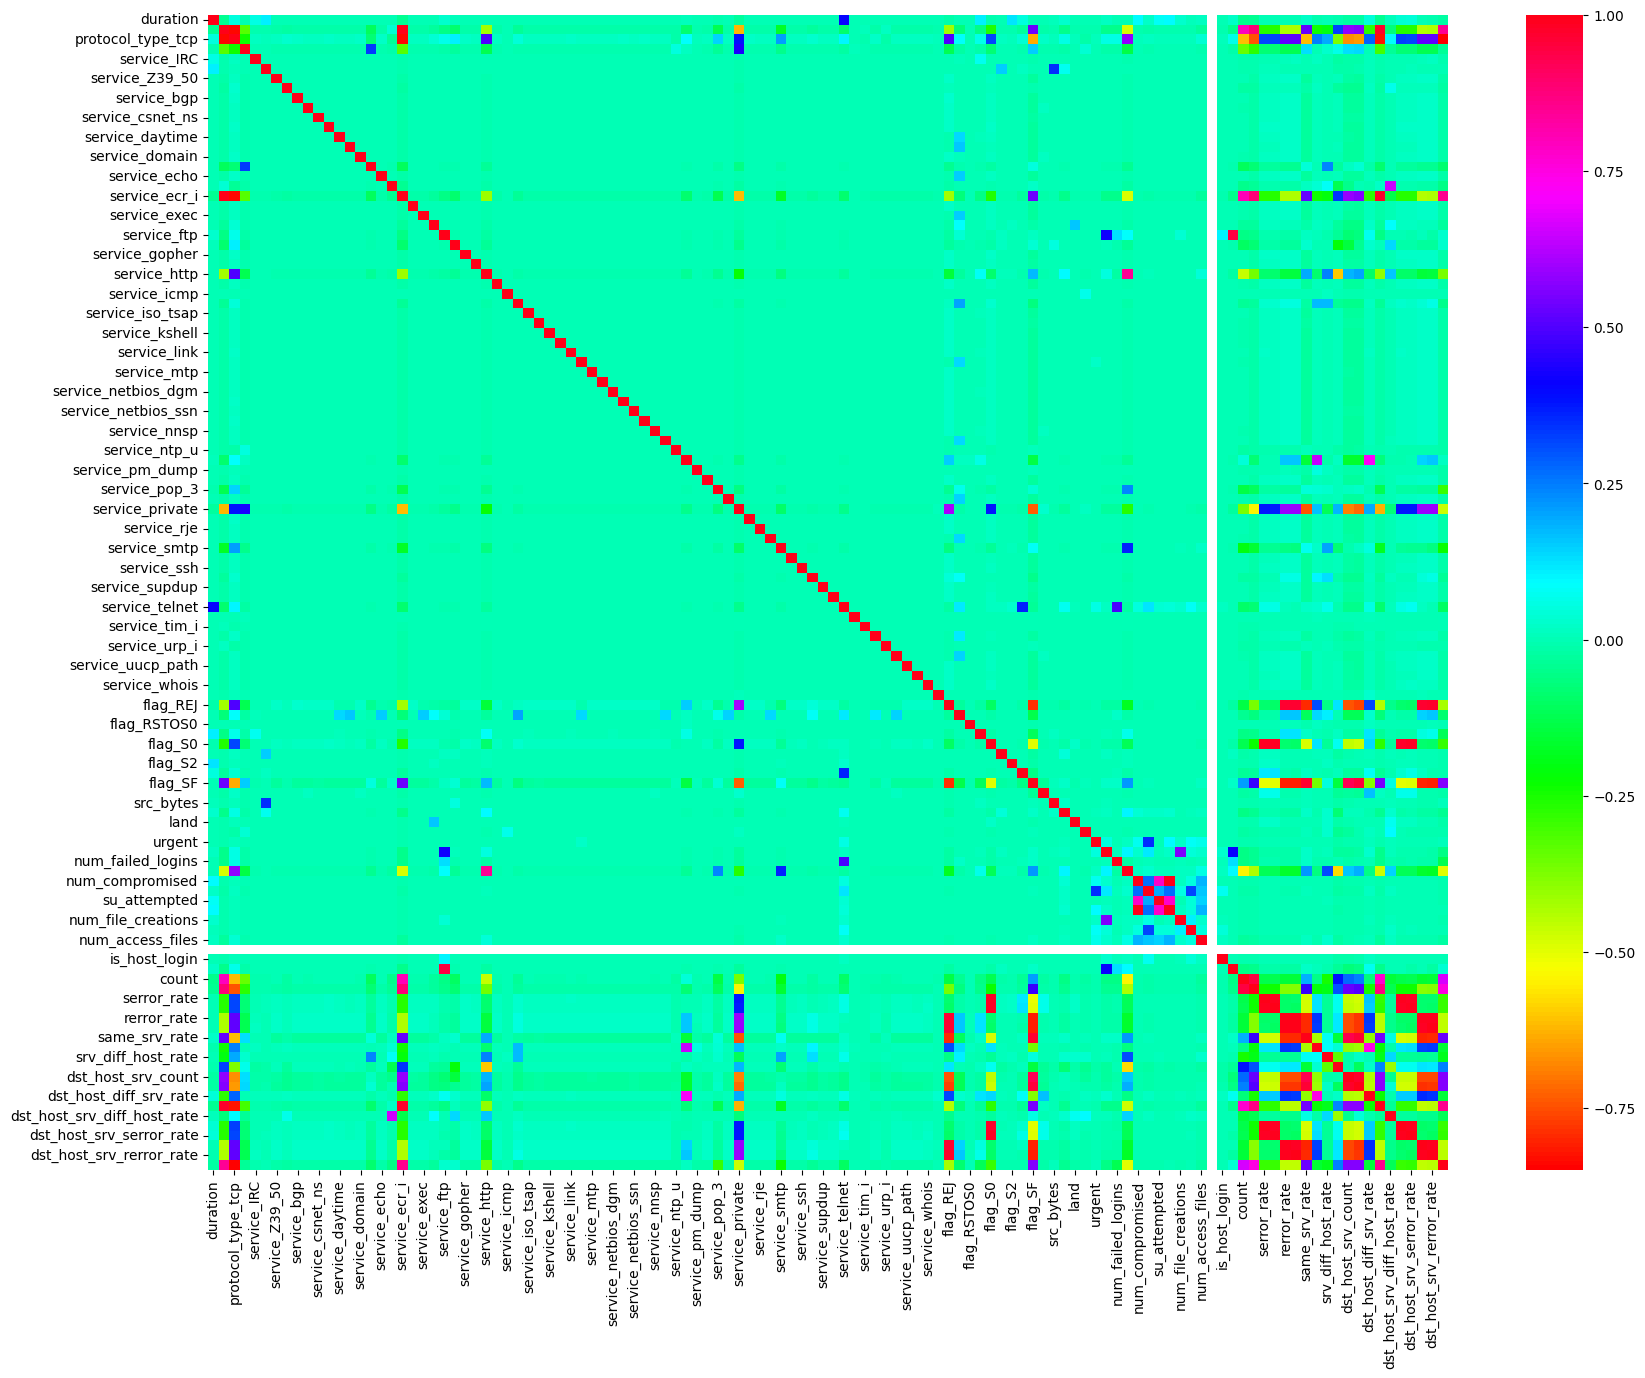

In [14]:
show_feature_correlation(all_df)